In [8]:
import pandas
import numpy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Directory = r"C:\Users\aoons\Desktop\flowers\flower_photos"
Image_Size = 224
Batch_Size = 64

In [9]:
train_datagen= ImageDataGenerator(
validation_split=0.1,
shear_range= 0.2,
zoom_range = 0.2,
horizontal_flip = True,
rescale = 1./255)

test_datagen= ImageDataGenerator(
validation_split=0.1,
rescale = 1./255)

train_datagen = train_datagen.flow_from_directory(
    Directory,
    target_size = (Image_Size,Image_Size),
    batch_size = Batch_Size,
    subset = "training",
    class_mode = 'categorical'
)

test_datagen = test_datagen.flow_from_directory(
    Directory,
    target_size = (Image_Size,Image_Size),
    batch_size = Batch_Size,
    class_mode = 'categorical',
    subset = "validation"
)

Found 2586 images belonging to 4 classes.
Found 285 images belonging to 4 classes.


In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization,Activation,Dropout

In [13]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(4,activation='softmax'))

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 32)        

In [14]:
cnn.compile(optimizer='adam',loss= 'binary_crossentropy',metrics = ['accuracy'])

In [25]:
plots= cnn.fit(train_datagen,epochs=15,validation_data = test_datagen)

Epoch 1/15
41/41 [==============================] - 133s 3s/step - loss: 0.2455 - accuracy: 0.7997 - val_loss: 0.3192 - val_accuracy: 0.7439
Epoch 2/15
41/41 [==============================] - 126s 3s/step - loss: 0.2452 - accuracy: 0.8012 - val_loss: 0.3172 - val_accuracy: 0.7404
Epoch 3/15
41/41 [==============================] - 123s 3s/step - loss: 0.2370 - accuracy: 0.8032 - val_loss: 0.3205 - val_accuracy: 0.7333
Epoch 4/15
41/41 [==============================] - 122s 3s/step - loss: 0.2309 - accuracy: 0.8125 - val_loss: 0.3177 - val_accuracy: 0.7439
Epoch 5/15
41/41 [==============================] - 117s 3s/step - loss: 0.2272 - accuracy: 0.8132 - val_loss: 0.3076 - val_accuracy: 0.7474
Epoch 6/15
41/41 [==============================] - 44s 1s/step - loss: 0.2314 - accuracy: 0.8155 - val_loss: 0.3216 - val_accuracy: 0.7544
Epoch 7/15
41/41 [==============================] - 43s 1s/step - loss: 0.2239 - accuracy: 0.8167 - val_loss: 0.3173 - val_accuracy: 0.7439
Epoch 8/15
41/4

In [26]:
cnn2=cnn.summary()
cnn.build()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 32)        

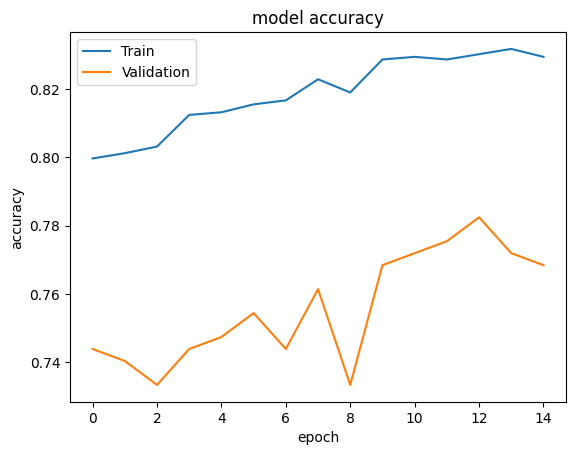

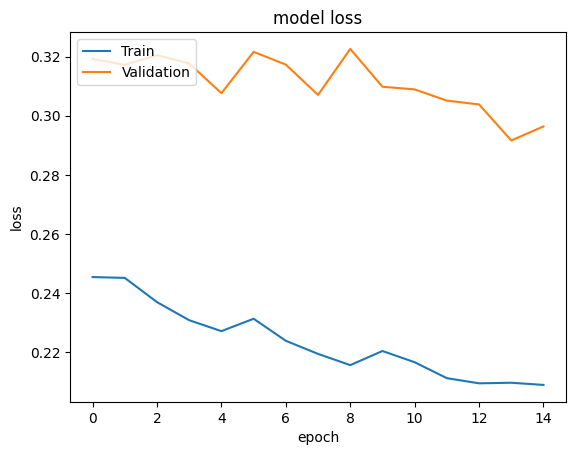

In [28]:
plt.plot(plots.history['accuracy'])
plt.plot(plots.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(plots.history['loss'])
plt.plot(plots.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

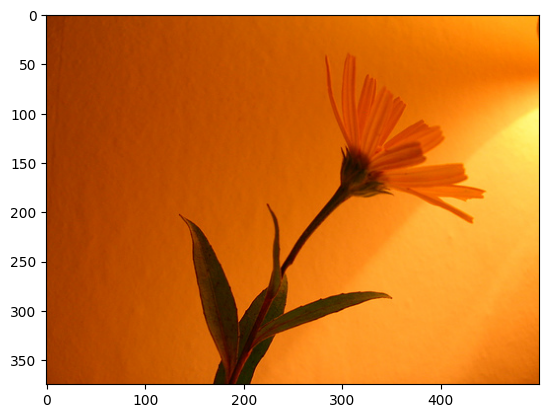

In [41]:
import cv2
import numpy as np

img = cv2.imread(r"C:\Users\aoons\Desktop\flowers\flower_photos\daisy\267148092_4bb874af58.jpg")
img = cv2.resize(img,(224,224))
img_array = np.array(img)
img_array.shape

img_array = img_array.reshape(1,224,224,3)
img_array.shape

from tensorflow.keras.preprocessing import image
img = image.load_img(r"C:\Users\aoons\Desktop\flowers\flower_photos\daisy\267148092_4bb874af58.jpg")
plt.imshow(img)


1/1 [==============================] - 0s 25ms/step
Predicted class: 0


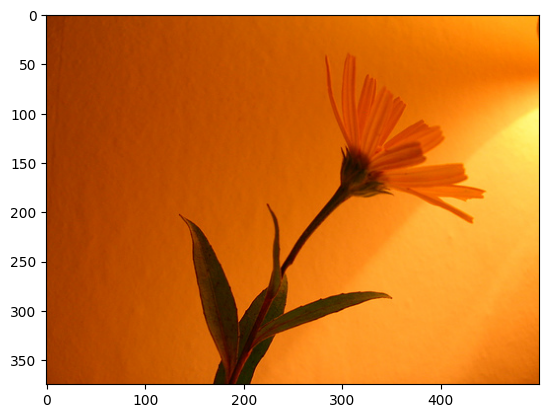

In [46]:
a = cnn.predict(img_array)
class_index = a.argmax()

plt.imshow(img)
print("Predicted class:", class_index)